1. Cho tập dữ liệu như sau:
X = {150, 147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183}
Y = {90, 49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68}

In [89]:
X = [150, 147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]
y = [90, 49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68]

* Biểu diễn tập dữ liệu lên mặt phẳng toạ độ Oxy

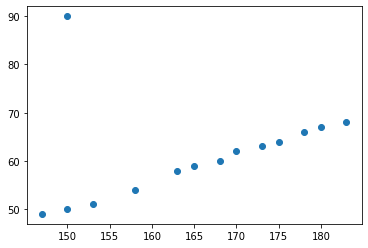

In [90]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

* Vẽ đường hồi quy lên mặt phẳng toạ độ

In [117]:
def t(X):
  l = []
  for i in X:
    a = 1 + i/3
    l.append(a)
  return l
y_sub = t(X)
y_sub

[51.0,
 50.0,
 51.0,
 52.0,
 53.666666666666664,
 55.333333333333336,
 56.0,
 57.0,
 57.666666666666664,
 58.666666666666664,
 59.333333333333336,
 60.333333333333336,
 61.0,
 62.0]

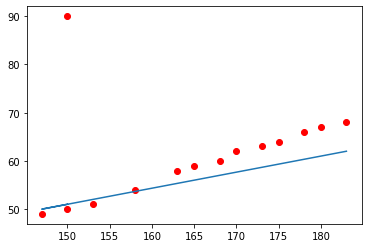

In [118]:
plt.plot(X,y,'ro')
plt.plot(X,y_sub)

Nhận xét kết quả và đề xuất hướng xử lý

ta 

w =  [[22.21867545]
 [ 0.23775985]]


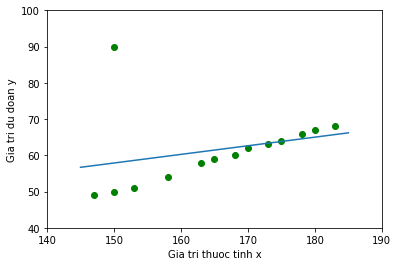

In [91]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[150, 147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y = np.array([[90, 49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

one = np.ones((x.shape[0],1))
Xbar = np.concatenate((one, x),axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(x.T, y.T, 'ro', color ="green")     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 40, 100])
plt.xlabel("Gia tri thuoc tinh x")
plt.ylabel("Gia tri du doan y")
plt.show()

2. Sử dụng thuộc tính (lotsize, bedrooms, stories, garagepl) trong tập dữ liệu
Housing_2019.csv để dự báo giá nhà. Sử dụng nghi thức hold-out để huấn luyện và
đánh giá mô hình. Sử dụng chỉ số MSE và RMSE để đánh giá mô hình

In [50]:
from google.colab import files
uploaded = files.upload()

Saving Housing_2019.csv to Housing_2019.csv


In [51]:
import pandas as pd
dt = pd.read_csv("Housing_2019.csv", index_col = 0)
dt.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [52]:
X = dt.iloc[:,[1,2,4,10]]
y = dt.price


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.3, random_state = 42)

from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [55]:
y_pred = lm.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np
err = mean_squared_error(y_test, y_pred)
result = np.sqrt(err)
result

20175.73020014342

3. Thí nghiệm sau đây tìm mối liên hệ giữa hàm lượng gỗ cứng (hardwoord
concentration) và độ căng (tensile strength) của vật liệu. Mười chín vật liệu khác nhau
với nhiều hàm lượng gỗ cứng được thử nghiệm để đo độ căng mạnh của vật liệu, và
kết quả được tóm lược trong bảng số liệu sau đây:

In [57]:
from google.colab import files
uploaded = files.upload()

Saving ham_luong_go.csv to ham_luong_go (1).csv


In [58]:
import pandas as pd
import numpy as np
dt = pd.read_csv('ham_luong_go.csv')
dt.head()

,id,x,y
0,1,1.0,6.3
1,2,1.5,11.1
2,3,2.0,20.0
3,4,3.0,24.0
4,5,4.0,26.1


Biểu đồ mối liên hệ giữa hàm lượng gỗ và độ căng mạnh

In [59]:
X = np.array([dt.x])
y = dt.y
X = X.reshape(-1,1)
print(type(X))
print(y.shape)

<class 'numpy.ndarray'>
(19,)


Text(0, 0.5, 'Do cang')

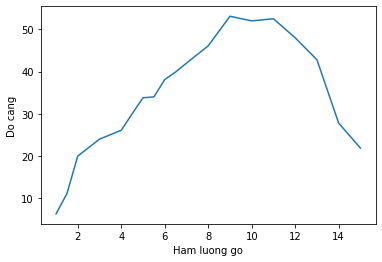

In [60]:
import matplotlib.pyplot as plt
plt.plot(X,y)
plt.xlabel('Ham luong go')
plt.ylabel('Do cang')

Xây dựng phương trình thể hiện mối liên hệ giữa hàm lượng gỗ cứng và độ căng mạnh của vật liệu.

In [61]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1.0/10, random_state = 42)
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [62]:
print(lm.intercept_)
print(lm.coef_)

25.36666666666666
[1.37333333]


In [63]:
print(X_test)
y_pred = lm.predict(X_test)
y_pred

[[1. ]
 [4.5]]


array([26.74      , 31.54666667])

In [64]:
from sklearn.metrics import mean_squared_error
err = mean_squared_error(y_test, y_pred)
print(np.sqrt(err))

14.494581363009031


vậy ta có phương trình thể hiện mối liên hệ giữa hàm lượng gỗ cứng và độ căng mạnh của vật liệu là:
  y = 25.37 + 1.37X với y là độ căng và X là hàm lượng gỗ

4. Áp dụng giải thuật Rừng ngẫu nhiên trên tập dữ liệu dự đoán chất lượng rượu vang
với nghi thức hold-out **văn bản in đậm**

In [66]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [74]:
import pandas as pd
dt = pd.read_csv('winequality-white.csv', sep = ';')


In [76]:
X = dt.iloc[:,:11]
y = dt.quality
print(X.shape)
print(y.shape)

(4898, 11)
(4898,)


In [77]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 1.0/3, random_state=42)


In [79]:
from sklearn.ensemble import RandomForestRegressor
rd = RandomForestRegressor(max_depth=5, random_state = 0)
rd.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [80]:
y_pred = rd.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error
err = mean_squared_error(y_test, y_pred)
print(np.sqrt(err))

0.6973631867926346


Đánh giá mô hình với thực toán rừng ngẫu nhiên bằng RMSE

5. Áp dụng giải thuật “AdaBoostClassifier” trên tập dữ liệu dự đoán chất lượng rượu
vang với nghi thức K-fold

In [84]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
for k_train,k_test in kf.split(X):
  X_train, X_test = X.iloc[k_train], X.iloc[k_test]
  y_train, y_test = y.iloc[k_train], y.iloc[k_test]
print(X_test.shape, y_test.shape)

(979, 11) (979,)


In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [88]:
y_pred = clf.predict(X_test)
y_pred

array([7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7,
       6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7,
       6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 7, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 7, 6, 7, 6,
       6, 7, 7, 6, 6, 6, 7, 7, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 7, 6, 7,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 7, 6, 6, 7, 7, 6, 7, 6, 6, 6, 6, 7, 7, 6, 6, 6, 7, 6, 7, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,